# Predicting The Weather Using Machine Learning

This project will predict the weather using machine learning using weather data from Oakland International Airport.

In [1]:
# Reading in the initial data

%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge

from sklearn.metrics import mean_absolute_error

weather = pd.read_csv("oakland_international_airport_weather.csv", index_col="DATE")

In [2]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16859 entries, 1960-01-01 to 2022-01-28
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  16859 non-null  object 
 1   NAME     16859 non-null  object 
 2   ACMH     5844 non-null   float64
 3   ACSH     5844 non-null   float64
 4   AWND     8051 non-null   float64
 5   DAPR     8 non-null      float64
 6   FMTM     2190 non-null   float64
 7   FRGT     2 non-null      float64
 8   MDPR     8 non-null      float64
 9   PGTM     8512 non-null   float64
 10  PRCP     16578 non-null  float64
 11  SNOW     11380 non-null  float64
 12  SNWD     11504 non-null  float64
 13  TAVG     2037 non-null   float64
 14  TMAX     16850 non-null  float64
 15  TMIN     16849 non-null  float64
 16  TSUN     1151 non-null   float64
 17  WDF1     5844 non-null   float64
 18  WDF2     8052 non-null   float64
 19  WDF5     7965 non-null   float64
 20  WDFG     4267 non-null   float64
 21  WSF

In [3]:
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [4]:
weather.tail()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
2022-01-24,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,4.47,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2022-01-25,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,4.70,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2022-01-26,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,2.68,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2022-01-27,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,3.13,NaN,NaN,NaN,NaN,1526.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-28,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preparing the Data

In this data, there are 5 primary columns that are needed for finding the weather:
* `PRCP` — total precipitation
* `TMAX` — maximum daily temperature
* `TMIN` — minimum daily temperature
* `SNOW` — the total daily snowfall
* `SNWD` — total snow depth on the ground

We will make a new dataset that has these five columns and rename the columns so the column names are readable and more compatible with Python.

In [5]:
weather['PRCP']

DATE
1960-01-01    0.0
1960-01-02    0.0
1960-01-03    0.0
1960-01-04    0.0
1960-01-05    0.0
             ... 
2022-01-24    0.0
2022-01-25    0.0
2022-01-26    0.0
2022-01-27    0.0
2022-01-28    0.0
Name: PRCP, Length: 16859, dtype: float64

In [6]:
weather['TMAX']

DATE
1960-01-01    49.0
1960-01-02    49.0
1960-01-03    54.0
1960-01-04    54.0
1960-01-05    55.0
              ... 
2022-01-24    60.0
2022-01-25    57.0
2022-01-26    57.0
2022-01-27    67.0
2022-01-28    64.0
Name: TMAX, Length: 16859, dtype: float64

In [7]:
weather_primary = pd.DataFrame().assign(precipitation = weather['PRCP'], max_temp = weather['TMAX'], min_temp = weather['TMIN'], snowfall = weather['SNOW'], ground_snow_depth = weather['SNWD'])

In [8]:
weather_primary

,precipitation,max_temp,min_temp,snowfall,ground_snow_depth
DATE,,,,,
1960-01-01,0.0,49.0,30.0,0.0,0.0
1960-01-02,0.0,49.0,29.0,0.0,0.0
1960-01-03,0.0,54.0,35.0,0.0,0.0
1960-01-04,0.0,54.0,36.0,0.0,0.0
1960-01-05,0.0,55.0,33.0,0.0,0.0
...,...,...,...,...,...
2022-01-24,0.0,60.0,39.0,NaN,NaN
2022-01-25,0.0,57.0,43.0,NaN,NaN
2022-01-26,0.0,57.0,41.0,NaN,NaN


## Filling in Missing Data
We have our five core columns, so we can focus on filling in any missing data. This is important because most machine learning algorithms can't work with missing data. To resolve this, we'll need to fill in the missing values or remove the rows/columns. Sometimes we may even remove columns with all missing values if they are not useful.

In this step, we will:

1. Investigate the `snowfall` and `ground_snow_depth` columns to check if they are useful.
2. Look at the `precipitation` and fill the missing values with appropriate values.
3. Look at `min_temp` and `max_temp` and fill in the missing data.
4. Check if 9999, which indicates a measurement error, is in any of the columns.

### Investigating Columns `snowfall` and `ground_snow_depth`

#### Investigating `snowfall`

In [9]:
weather_primary['snowfall']

DATE
1960-01-01    0.0
1960-01-02    0.0
1960-01-03    0.0
1960-01-04    0.0
1960-01-05    0.0
             ... 
2022-01-24    NaN
2022-01-25    NaN
2022-01-26    NaN
2022-01-27    NaN
2022-01-28    NaN
Name: snowfall, Length: 16859, dtype: float64

In [10]:
weather_primary['snowfall'].value_counts()

0.0    11379
1.0        1
Name: snowfall, dtype: int64

In [11]:
del weather_primary['snowfall']

`snowfall` is quite useless because there is just one value that says 1, 11,379 values that are 0, and 5,479 null values (if you use math).

#### Investigating `ground_snow_depth`

In [12]:
weather_primary['ground_snow_depth']

DATE
1960-01-01    0.0
1960-01-02    0.0
1960-01-03    0.0
1960-01-04    0.0
1960-01-05    0.0
             ... 
2022-01-24    NaN
2022-01-25    NaN
2022-01-26    NaN
2022-01-27    NaN
2022-01-28    NaN
Name: ground_snow_depth, Length: 16859, dtype: float64

In [13]:
weather_primary['ground_snow_depth'].value_counts()

0.0    11504
Name: ground_snow_depth, dtype: int64

In [14]:
del weather_primary['ground_snow_depth']

`ground_snow_depth` is quite useless because there are 11,504 values that are 0, and 5,355 null values (if you use math).

### Filling Missing Values of `precipiation`

In [15]:
weather_primary['precipitation']

DATE
1960-01-01    0.0
1960-01-02    0.0
1960-01-03    0.0
1960-01-04    0.0
1960-01-05    0.0
             ... 
2022-01-24    0.0
2022-01-25    0.0
2022-01-26    0.0
2022-01-27    0.0
2022-01-28    0.0
Name: precipitation, Length: 16859, dtype: float64

In [16]:
weather_primary['precipitation'].value_counts()

0.00    13664
0.01      438
0.02      199
0.03      122
0.04      102
        ...  
1.29        1
1.73        1
1.05        1
1.38        1
1.02        1
Name: precipitation, Length: 176, dtype: int64

In [17]:
np.sort(weather_primary['precipitation'].unique())

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.29, 1.31, 1.32, 1.34, 1.37,
       1.38, 1.4 , 1.41, 1.42, 1.43, 1.46, 1.48, 1.49, 1.5 , 1.52, 1.56,
       1.59, 1.6 , 1.61, 1.62, 1.66, 1.68, 1.73, 1.

In [18]:
weather_primary['precipitation'].mean()

0.04774037881529696

In [19]:
weather_primary['precipitation'].fillna(value = 0, inplace = True)

The missing values of `precipitation` are filled as 0 because the mode of the values is 0.

### Investigating `min_temp` and `max_temp` and Filling in the Missing Data.

We will fill in the missing values of `min_temp` and `max` with the previous day's temperature.

#### Investigating `min_temp`

In [20]:
weather_primary['min_temp']

DATE
1960-01-01    30.0
1960-01-02    29.0
1960-01-03    35.0
1960-01-04    36.0
1960-01-05    33.0
              ... 
2022-01-24    39.0
2022-01-25    43.0
2022-01-26    41.0
2022-01-27    39.0
2022-01-28    39.0
Name: min_temp, Length: 16859, dtype: float64

In [21]:
weather_primary['min_temp'].value_counts()

55.0    1133
56.0    1090
54.0    1041
57.0     978
53.0     970
52.0     935
50.0     912
51.0     889
58.0     770
48.0     733
49.0     718
47.0     654
45.0     612
46.0     549
59.0     544
44.0     522
43.0     487
42.0     428
60.0     416
41.0     375
40.0     346
39.0     267
61.0     259
38.0     235
37.0     190
36.0     160
62.0     122
35.0     118
34.0      88
63.0      80
33.0      65
32.0      44
31.0      32
64.0      20
65.0      16
30.0      12
66.0      11
67.0       6
28.0       5
68.0       4
29.0       3
27.0       2
26.0       2
1.0        2
7.0        1
11.0       1
18.0       1
69.0       1
Name: min_temp, dtype: int64

In [22]:
np.sort(weather_primary['min_temp'].unique())

array([ 1.,  7., 11., 18., 26., 27., 28., 29., 30., 31., 32., 33., 34.,
       35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47.,
       48., 49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60.,
       61., 62., 63., 64., 65., 66., 67., 68., 69., nan])

In [23]:
weather_primary['min_temp'].mean()

50.43153896373672

In [24]:
weather_primary['min_temp'].fillna(method = 'ffill', inplace = True)

#### Investigating `max_temp`

In [25]:
weather_primary['max_temp']

DATE
1960-01-01    49.0
1960-01-02    49.0
1960-01-03    54.0
1960-01-04    54.0
1960-01-05    55.0
              ... 
2022-01-24    60.0
2022-01-25    57.0
2022-01-26    57.0
2022-01-27    67.0
2022-01-28    64.0
Name: max_temp, Length: 16859, dtype: float64

In [26]:
weather_primary['max_temp'].value_counts()

67.0     831
68.0     830
60.0     823
66.0     808
65.0     808
        ... 
100.0      2
39.0       1
38.0       1
122.0      1
107.0      1
Name: max_temp, Length: 66, dtype: int64

In [27]:
np.sort(weather_primary['max_temp'].unique())

array([ 38.,  39.,  40.,  41.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,
        50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,
        61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
        72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,
        83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,
        94.,  95.,  96.,  97.,  98.,  99., 100., 101., 104., 107., 122.,
        nan])

In [28]:
weather_primary['max_temp'].mean()

65.67566765578636

In [29]:
weather_primary['max_temp'].fillna(method = 'ffill', inplace = True)

### Check if 9999, which indicates a measurement error, is in any of the columns.

We do not need to add new code for this step, because we checked all the unique values in each column, and 9999 did not exist.

### View of the Dataset

In [30]:
weather_primary

,precipitation,max_temp,min_temp
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-01-02,0.0,49.0,29.0
1960-01-03,0.0,54.0,35.0
1960-01-04,0.0,54.0,36.0
1960-01-05,0.0,55.0,33.0
...,...,...,...
2022-01-24,0.0,60.0,39.0
2022-01-25,0.0,57.0,43.0
2022-01-26,0.0,57.0,41.0


The dataset looks way cleaner (`precipitation` looks like it is full of zeros, but there are decimals, so it is useful).

## Verifying Data Types

Now that the missing data is filled, it is time to ensure that the columns have the correct data types. Machine learning algorithms can only work with numeric data types. Additionally, having the index in the correct datetime format will enable calculating predictor columns more easily.

Steps:
1. Ensure that all of the columns are numeric (float or integer).
2. Verify the index is stored as a datetime. If it isn't, then convert it.

P.S. Floats are decimals.

### Ensuring that All of the Columns are Numeric

In [31]:
weather_primary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16859 entries, 1960-01-01 to 2022-01-28
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  16859 non-null  float64
 1   max_temp       16859 non-null  float64
 2   min_temp       16859 non-null  float64
dtypes: float64(3)
memory usage: 1.0+ MB


All the columns are float, so they are numeric.

### Verifying that the Index is Stored as a Datetime

In [32]:
weather_primary.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23',
       '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28'],
      dtype='object', name='DATE', length=16859)

The index is an object, which is a string, but these are in date formats, so we can convert them into datetimes.

In [33]:
weather_primary.index = pd.to_datetime(weather_primary.index)

In [34]:
weather_primary.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26',
               '2022-01-27', '2022-01-28'],
              dtype='datetime64[ns]', name='DATE', length=16859, freq=None)

The index is finally converted into a datetime.

## Analyzing Weather Data

Now that the prepared our data, some analysis can be done and plots can be created to visualize weather over time. In this exploration, it will be figured that some years of data are missing. This isn't a big deal for the model that is being created, but it may be a good idea to investigate further.

Steps:
1. Use pandas to plot the `min_temp` and `max_temp` columns to find interesting trends.
2. Plot the precipitation over time.
3. Calculate precipitation by year, and plot it.
4. Investigate why some days/years are missing.

### Using Pandas to Plot the `min_temp` and `max_temp` Columns and Find Interesting Trends

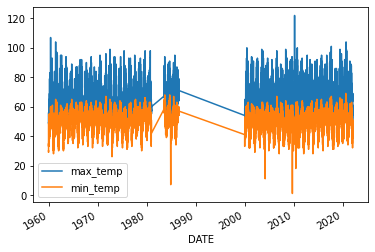

In [35]:
weather_primary[["max_temp", "min_temp"]].plot()
plt.show()

In [36]:
weather_primary.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    364
2022     28
Name: DATE, dtype: int64

There are gaps between 1981 and 1982 and gaps between 1987 and 1999.

### Plot Precipitation over Time

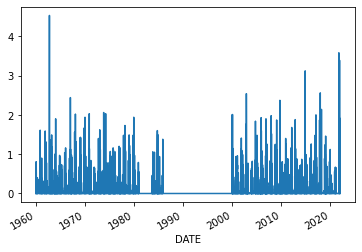

In [37]:
weather_primary["precipitation"].plot()
plt.show()

There are gaps between 1981 and 1982 and gaps between 1987 and 1999 (based on the observation above).

### Calculate and Plot Precipitation by Year

In [38]:
weather_primary.groupby(weather_primary.index.year).sum()['precipitation']

DATE
1960    14.01
1961    13.87
1962    22.47
1963    19.11
1964    16.83
1965    16.32
1966    13.11
1967    23.98
1968    17.19
1969    25.70
1970    25.31
1971    10.61
1972    16.27
1973    29.37
1974    16.87
1975    17.54
1976     8.64
1977    11.70
1978    22.57
1979    23.79
1980    13.58
1983     7.13
1984    16.03
1985     8.50
1986     0.00
2000    21.09
2001    22.84
2002    19.12
2003    11.37
2004    12.97
2005    27.37
2006    22.79
2007    12.79
2008    13.86
2009    14.57
2010    22.67
2011    16.06
2012    22.93
2013     4.89
2014    19.62
2015     8.58
2016    19.77
2017    23.34
2018    16.82
2019    20.00
2020     6.42
2021    20.82
2022     0.25
Name: precipitation, dtype: float64

<AxesSubplot:xlabel='DATE'>

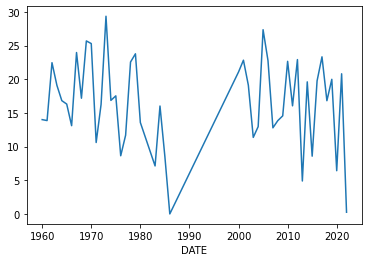

In [39]:
weather_primary.groupby(weather_primary.index.year).sum()['precipitation'].plot()

The data shows that the overall precipitation has sharp rises and falls, and over time, the precipitation gradually decreases.

## Training an Initial Model

Now that the columns are prepared, it is time to train the initial machine learning model!

Tomorrow's temperature will be predicted given historical data. Ro do this, target column needs to be created, then train and test set needs to be created and the model will be trained.

Future data cannot be used to predict the past.

Steps:
1. Create a target column. This should be the maximum temperature for the next day.
2. The last row won't have a next day, so it won't have a target. Remove the last row in the data.
3. Initialize a machine learning model.
4. Split the data into training and test sets, respecting the order of the data.
5. Fit the model to the training dataset.

### Create a Target Column: Maximum Temperature for the Next Day + Remove Last Row

In [40]:
weather_primary['target'] = weather_primary.shift(-1)['max_temp']

In [41]:
weather_primary

,precipitation,max_temp,min_temp,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0
2022-01-26,0.0,57.0,41.0,67.0


In [42]:
weather_primary = weather_primary.iloc[:-1,:].copy()

In [43]:
weather_primary

,precipitation,max_temp,min_temp,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0


### Initialize a Machine Learning Model

In [44]:
reg = Ridge(alpha = .1)

In [45]:
predictors = ['precipitation', 'max_temp', 'min_temp']

### Split the Data into Training and Test Sets, Respecting the Order of the Data

In [46]:
train = weather_primary.loc[:"2020-12-31"]
test = weather_primary.loc['2021-01-01':]

In [47]:
reg.fit(train[predictors], train['target'])

Ridge(alpha=0.1)

## Measuring Accuracy

Now that a model is created, the accuracy can be evaluated. It will tell how good the model is at making predictions and it will inform how to improve it.

Using mean absolute error is a good choice for measuring the model's accuracy.

Steps:
1. Create predictions on the test set.
2. Measure the model's accuracy.
3. Create a plot showing the actual temperature values and the predictions. This can be done by first combining the predictions and actuals into a single DataFrame.

### Create Predictions on the Test Set

In [48]:
predictions = reg.predict(test[predictors])

### Measure the Model's Accuracy

In [49]:
mean_absolute_error(test['target'],  predictions)

3.4111699434528306

### Create a Plot Showing Actual Temperature Values and Predictions

In [50]:
combined = pd.concat([test['target'], pd.Series(predictions, index = test.index)], axis = 1)

In [51]:
combined.columns = ['actual', 'predictions']

In [52]:
combined

,actual,predictions
DATE,,
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
2021-01-05,59.0,59.444266
...,...,...
2022-01-23,60.0,59.985714
2022-01-24,57.0,59.626333
2022-01-25,57.0,58.181680


<AxesSubplot:xlabel='DATE'>

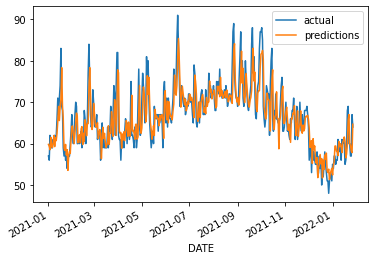

In [53]:
combined.plot()

The predictions tend to go higher if the actual temperature is high and some tend to go lower if the actual temperature is low, but sometimes, the opposite cases happen.

## Building a Prediction Function

Earlier,  several lines of code were written to split the datasets, train the model, and make predictions. This means that whenever model will be re-runned, the code needs to copied and pasted.

Instead, this will be wrapped into a function to make it easier.

In [54]:
def create_predictions(predictors, weather_primary, reg):
    train = weather_primary.loc[:"2020-12-31"]
    test = weather_primary.loc['2021-01-01':]
    reg.fit(train[predictors], train['target'])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test['target'],  predictions)
    combined = pd.concat([test['target'], pd.Series(predictions, index = test.index)], axis = 1)
    combined.columns = ['actual', 'predictions']
    return error, combined

## Adding in Rolling Means

Next, some predictors will be added to the model to improve the model's accuracy. These predictors will be rolling averages of the temperature during a certain time period.

Steps:
1. Add a column containing average temperature over the previous 30 days.
2. Add in columns with the ratios between the average monthly temperature and the maximum and minimum temperature today.
3. Re-run the model, and evaluate accuracy.

### Adding a Column Containing Average Temperature Over the Previous 30 Days

In [55]:
weather_primary['month_max'] = weather_primary['max_temp'].rolling(30).mean()

In [56]:
weather_primary['month_min'] = weather_primary['min_temp'].rolling(30).mean()

In [57]:
weather_primary

,precipitation,max_temp,min_temp,target,month_max,month_min
DATE,,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN,NaN
1960-01-02,0.0,49.0,29.0,54.0,NaN,NaN
1960-01-03,0.0,54.0,35.0,54.0,NaN,NaN
1960-01-04,0.0,54.0,36.0,55.0,NaN,NaN
1960-01-05,0.0,55.0,33.0,53.0,NaN,NaN
...,...,...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0,56.900000,42.800000
2022-01-24,0.0,60.0,39.0,57.0,57.066667,42.433333
2022-01-25,0.0,57.0,43.0,57.0,57.200000,42.366667


### Adding in Columns with Ratios Between the Average Monthly Temperature and the Maximum and Minimum Temperature Today

In [58]:
weather_primary['month_day_max'] = weather_primary['month_max'] / weather_primary['max_temp']

In [59]:
weather_primary['max_min'] = weather_primary['month_max'] / weather_primary['month_min']

In [60]:
weather_primary

,precipitation,max_temp,min_temp,target,month_max,month_min,month_day_max,max_min
DATE,,,,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN,NaN,NaN,NaN
1960-01-02,0.0,49.0,29.0,54.0,NaN,NaN,NaN,NaN
1960-01-03,0.0,54.0,35.0,54.0,NaN,NaN,NaN,NaN
1960-01-04,0.0,54.0,36.0,55.0,NaN,NaN,NaN,NaN
1960-01-05,0.0,55.0,33.0,53.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0,56.900000,42.800000,0.948333,1.329439
2022-01-24,0.0,60.0,39.0,57.0,57.066667,42.433333,0.951111,1.344855
2022-01-25,0.0,57.0,43.0,57.0,57.200000,42.366667,1.003509,1.350118


### Re-Run the Model and Evaluate Accuracy

In [61]:
predictors = ['precipitation', 'max_temp', 'min_temp', 'month_max', 'month_day_max', 'max_min']

In [62]:
weather_primary = weather_primary.iloc[30:,:].copy()

In [63]:
error, combined = create_predictions(predictors, weather_primary, reg)

In [64]:
error

3.341062986816133

<AxesSubplot:xlabel='DATE'>

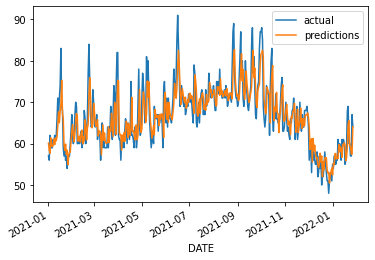

In [65]:
combined.plot()

There isn't much improvement according to the plot because the improvement is a decimal.

## Adding in Monthly and Daily Averages

Some more predictors can be tried to continue improving the accuracy. The historical monthly and daily temperatures will be added.

Be careful to only use past data to find the average temperature.

In [66]:
weather_primary['monthly_avg'] = weather_primary['max_temp'].groupby(weather_primary.index.month).apply(lambda df: df.expanding(1).mean())

In [67]:
weather_primary

,precipitation,max_temp,min_temp,target,month_max,month_min,month_day_max,max_min,monthly_avg
DATE,,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,42.366667,0.941808,1.311566,59.000000
1960-02-01,0.81,62.0,51.0,59.0,56.000000,43.100000,0.903226,1.299304,62.000000
1960-02-02,0.00,59.0,43.0,59.0,56.166667,43.366667,0.951977,1.295158,60.500000
1960-02-03,0.20,59.0,47.0,60.0,56.333333,43.733333,0.954802,1.288110,60.000000
1960-02-04,0.16,60.0,42.0,60.0,56.500000,44.033333,0.941667,1.283119,60.000000
...,...,...,...,...,...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0,56.900000,42.800000,0.948333,1.329439,56.781536
2022-01-24,0.00,60.0,39.0,57.0,57.066667,42.433333,0.951111,1.344855,56.783803
2022-01-25,0.00,57.0,43.0,57.0,57.200000,42.366667,1.003509,1.350118,56.783955


In [68]:
weather_primary["day_of_year_avg"] = weather_primary["max_temp"].groupby(weather_primary.index.dayofyear).apply(lambda df: df.expanding(1).mean())

### Re-Run the Model and Evaluate Accuracy

In [69]:
predictors = ['precipitation', 'max_temp', 'min_temp', 'month_max', 'month_day_max', 'max_min', 'monthly_avg', 'day_of_year_avg']

In [70]:
error, combined = create_predictions(predictors, weather_primary, reg)

In [71]:
error

3.316958459064637

## Conclusion

We made a machine learning model that can predict the weather for the next day with a mild error.